In [41]:
from statistics import correlation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from nbclient.client import timestamp
from pandas import read_csv

df = pd.read_csv('2023ActualForecastData.csv')
df['Date'] = pd.to_datetime(df['Date'])

df1 = pd.read_csv('2024ActualForecastData.csv')
df1['Date'] = pd.to_datetime(df1['Date'])

df2 = pd.read_csv('2025ActualForecastData.csv')
df2['Date'] = pd.to_datetime(df2['Date'])

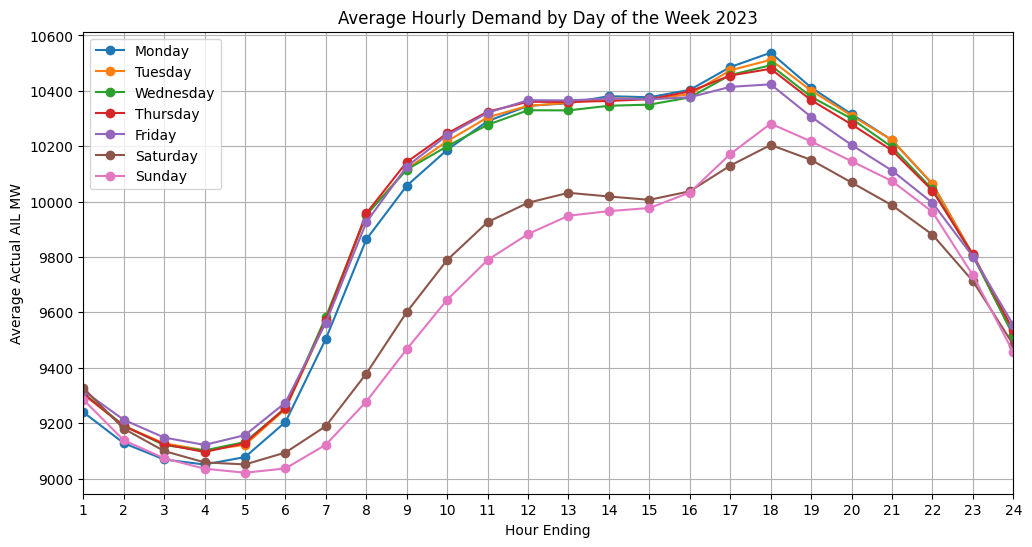

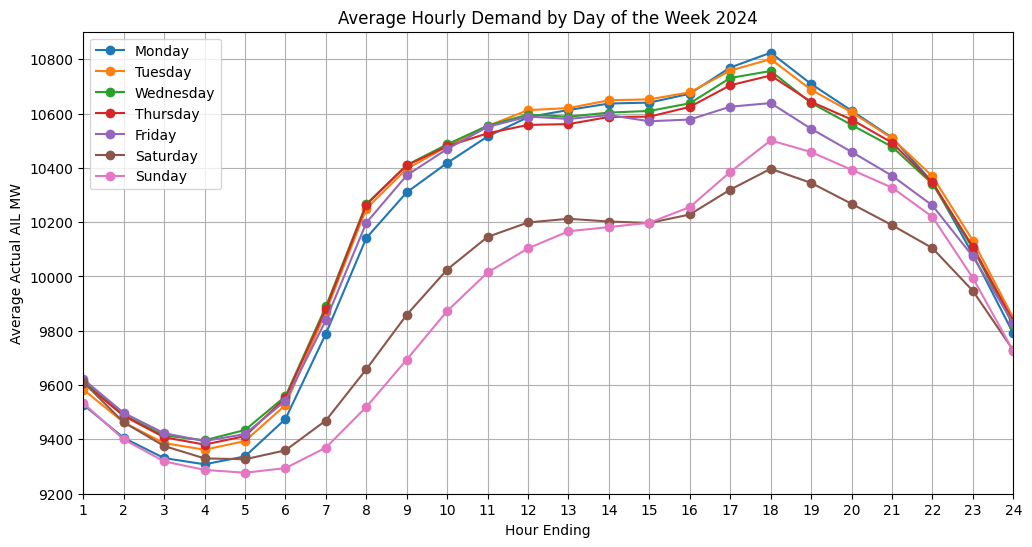

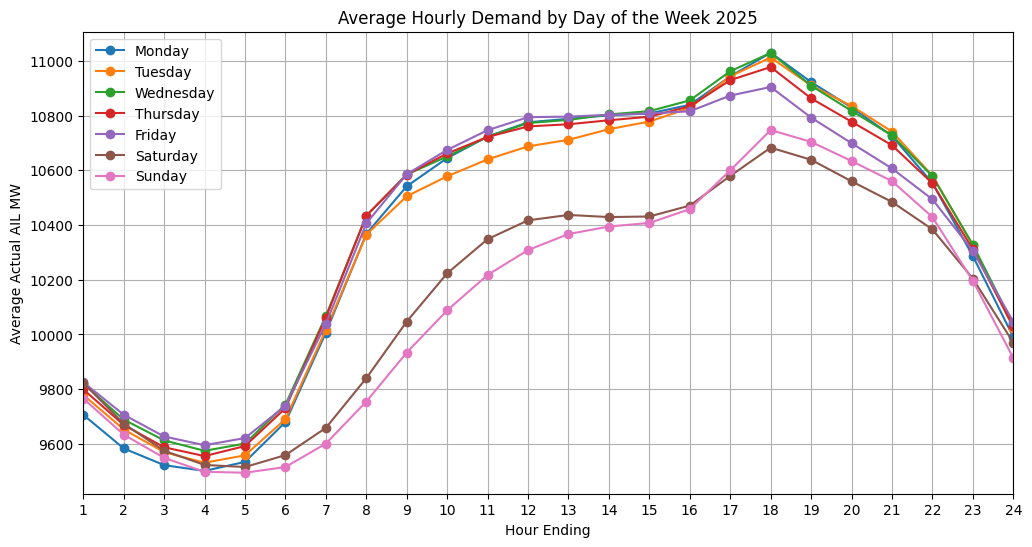

In [2]:
# Section 1: Average demand by hour on different days

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
D = df.groupby(['Hour', df['Date'].dt.weekday])['Actual AIL'].mean()
# Reshape data: Days become columns (lines), Hours become the index (x-axis)
Dday = D.unstack(level=1)
Dday = Dday.rename(columns=day_map)

D1 = df1.groupby(['Hour', df1['Date'].dt.weekday])['Actual AIL'].mean()
D1day = D1.unstack(level=1)
D1day = D1day.rename(columns=day_map)

D2 = df2.groupby(['Hour', df2['Date'].dt.weekday])['Actual AIL'].mean()
D2day = D2.unstack(level=1)
D2day = D2day.rename(columns=day_map)


################################# PLOTS #######################################

# Plot for 2023
Dday.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2023')
plt.ylabel('Average Actual AIL MW')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

# Plot for 2024
D1day.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2024')
plt.ylabel('Average Actual AIL MW')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

# Plot for 2025
D2day.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2025')
plt.ylabel('Average Actual AIL MW')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

plt.show()


Hourly demand shows persistent patterns with morning spikes from 6 to 8 AM most notably during weekdays and peak demand at 5 to 6 PM. Weekends are generally lower and slower in demand but follow a similar demand pattern to weekdays. Year over year analysis shows that there is an overall demand growth even with the lowest demand hour, 4 AM, showing a gradual increase from 2023 to 2025.

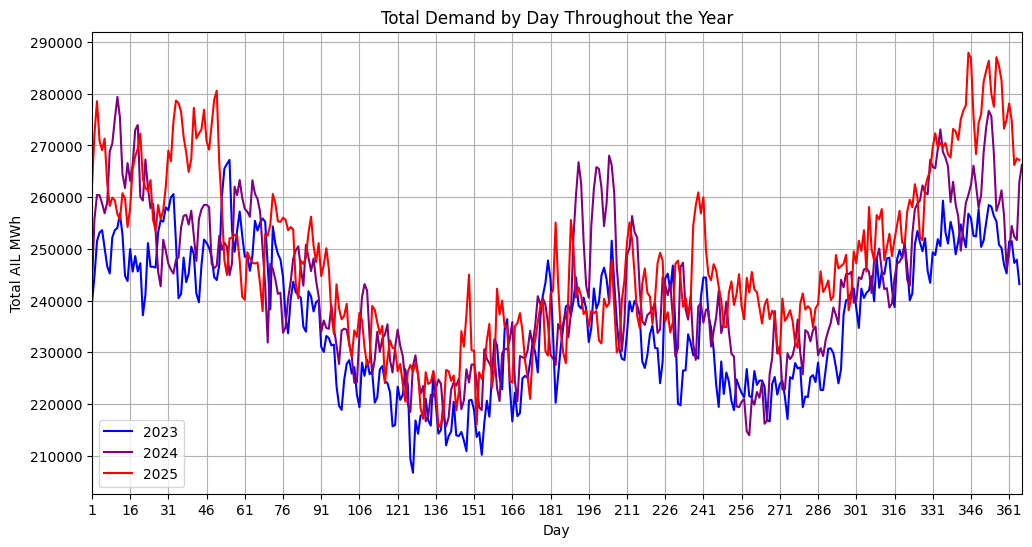

In [3]:
# Section 2: Total Demand by day

t = df.groupby(df['Date'].dt.dayofyear)['Actual AIL'].sum()
t1 = df1.groupby(df1['Date'].dt.dayofyear)['Actual AIL'].sum()
t2 = df2.groupby(df2['Date'].dt.dayofyear)['Actual AIL'].sum()

# Plot
td = pd.DataFrame({
    '2023': t,
    '2024': t1,
    '2025': t2
})
td.plot(figsize=(12, 6), alpha=1, color = ['blue', 'purple', 'red'], label = ['2023', '2024', '2025'])
plt.xlim(1, 366)
plt.xticks(range(1, 366, 15))
plt.title('Total Demand by Day Throughout the Year')
plt.ylabel('Total AIL MWh')
plt.xlabel('Day')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



Monthly demand patterns are consistent across 2023-2025. Weather conditions corresponds to heating and cooling needs as demand peaks during winter, Dec to Feb, and summer, July and August. Demand declines during milder seasons, usually reaching its lowest in May or September.

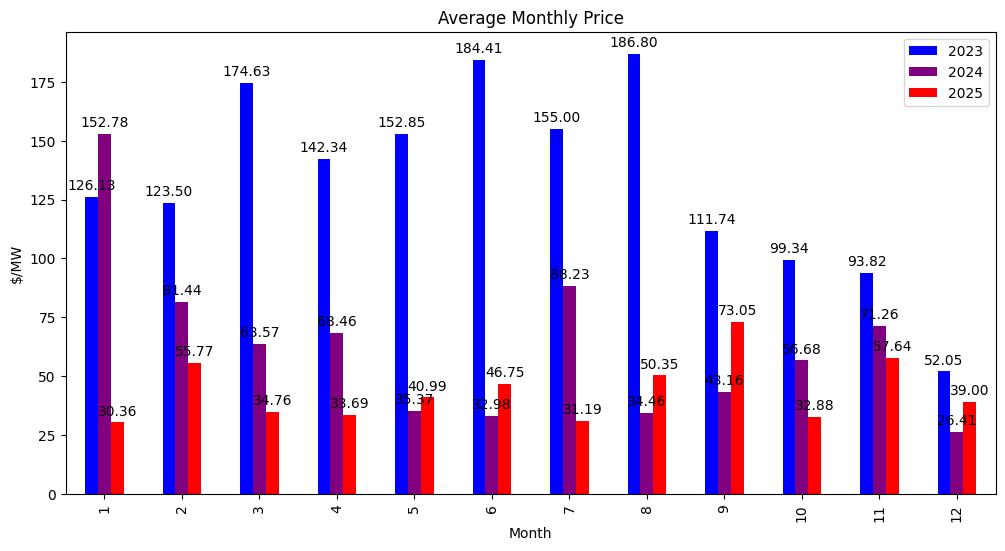

In [4]:
# Section 3: Average price/MWh by Month

pm = df.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()
pm1 = df1.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()
pm2 = df2.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()

# Plot for average price per month
price_monthly = pd.DataFrame({
    '2023': pm,
    '2024': pm1,
    '2025': pm2
})

# Create grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
price_monthly.plot(ax=ax1, kind='bar', color=['blue', 'purple', 'red'], alpha=1)

# Add values on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3)

plt.title('Average Monthly Price')
plt.xlabel('Month')
plt.ylabel('$/MW')
plt.legend(loc='upper right')
plt.show()




There was a significant drop in monthly average prices from 2023 to 2024-2025. This decline is explained by the addition of new generators to the grid, both gas fired and renewable generators,  increasing over all supply as well as lower natural gas prices from 2023.
https://discoverairdrie.com/articles/albertas-wholesale-power-price-dropped-53-in-2024-as-new-supply-surged

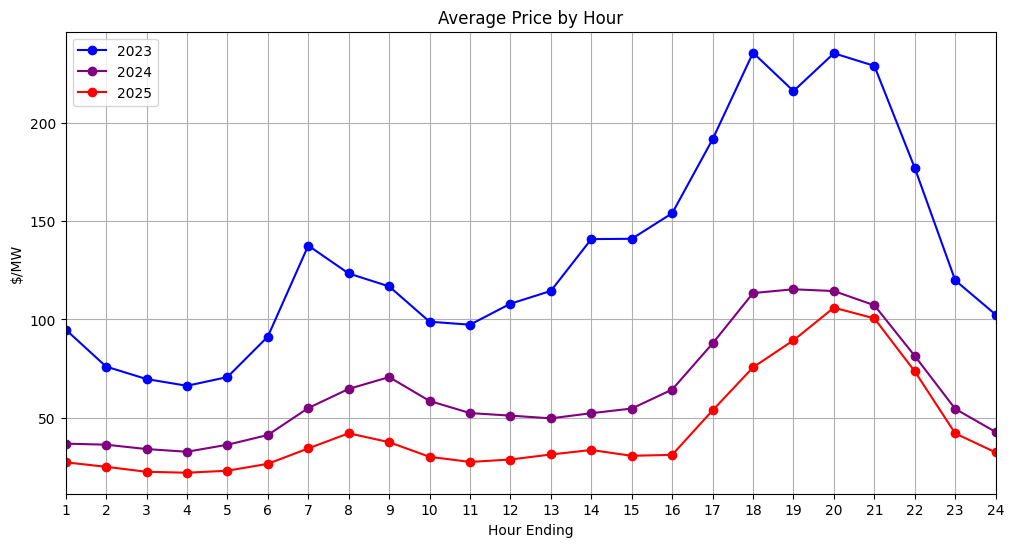

In [5]:
# Section 4: Average price/MW by hour

ph = df.groupby(df['Hour'])['Actual Posted Pool Price'].mean()
ph1 = df1.groupby(df['Hour'])['Actual Posted Pool Price'].mean()
ph2 = df2.groupby(df['Hour'])['Actual Posted Pool Price'].mean()

# Plot for average price per hour
fig, ax2 = plt.subplots(figsize=(12, 6))
price_hourly = pd.DataFrame({
    '2023': ph,
    '2024': ph1,
    '2025': ph2
})
price_hourly.plot(ax=ax2, kind='line', color=['blue','purple', 'red'], alpha=1, marker='o')
plt.xlim(1,24)
plt.xticks(range(1,25))
plt.title('Average Price by Hour')
plt.xlabel('Hour Ending')
plt.ylabel('$/MW')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Average hourly price have a similar pattern across the three years. Prices spike during morning ramp up in rush hours, 7 to 9 AM, and evening peak hour, 6 PM. Prices stabilize throughout the day, but notably remains elevated in the evening, 6 to 9 PM, despite demand declining in those hours.


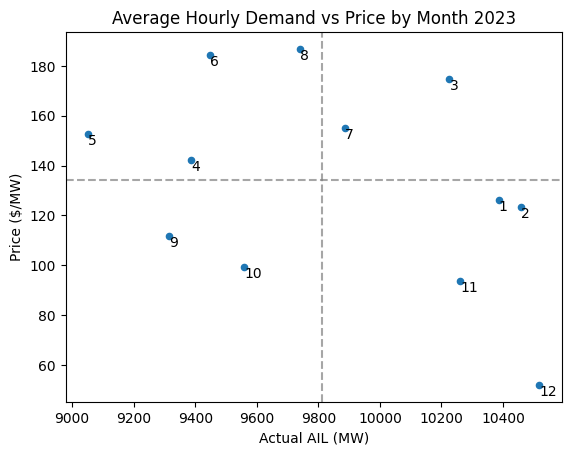

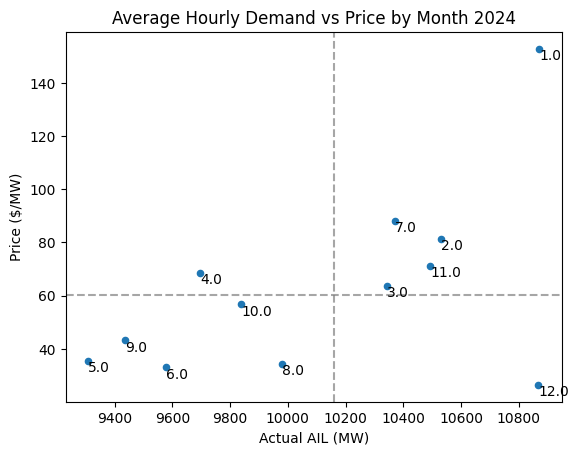

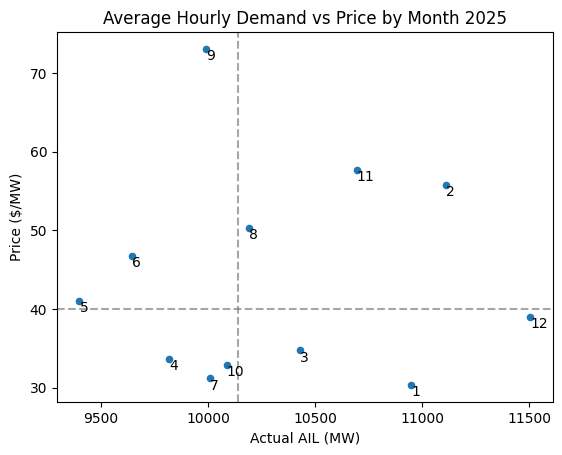

In [6]:
# Section 5: Relationship between price and demand by month

pd = df.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

pd1 = df1.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

pd2 = df2.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

# 2023
pd.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd['Actual AIL'].median()
median_price = pd['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd.index:
    plt.text(pd.loc[month, 'Actual AIL'],
             pd.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('Average Hourly Demand vs Price by Month 2023')
plt.xlabel('Actual AIL (MW)')
plt.ylabel('Price ($/MW)')
plt.show()

# 2024
pd1.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd1['Actual AIL'].median()
median_price = pd1['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd1.index:
    plt.text(pd1.loc[month, 'Actual AIL'],
             pd1.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('Average Hourly Demand vs Price by Month 2024')
plt.xlabel('Actual AIL (MW)')
plt.ylabel('Price ($/MW)')
plt.show()

# 2025
pd2.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd2['Actual AIL'].median()
median_price = pd2['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd2.index:
    plt.text(pd2.loc[month, 'Actual AIL'],
             pd2.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('Average Hourly Demand vs Price by Month 2025')
plt.xlabel('Actual AIL (MW)')
plt.ylabel('Price ($/MW)')
plt.show()

There is no clear pattern between price and demand. Despite December having among the highest demand, its average hourly prices are low compared to other months. The market operates on merit-order dispatch, that is lowest-cost bids are dispatched first until demand is met for that hour. Prices are then set by the marginal (highest) bid, so high demand doesn't always translate to high prices if enough low-cost generators are available. Conversely, moderate demand months can see elevated prices if low-cost generators are off the grid for maintenance.

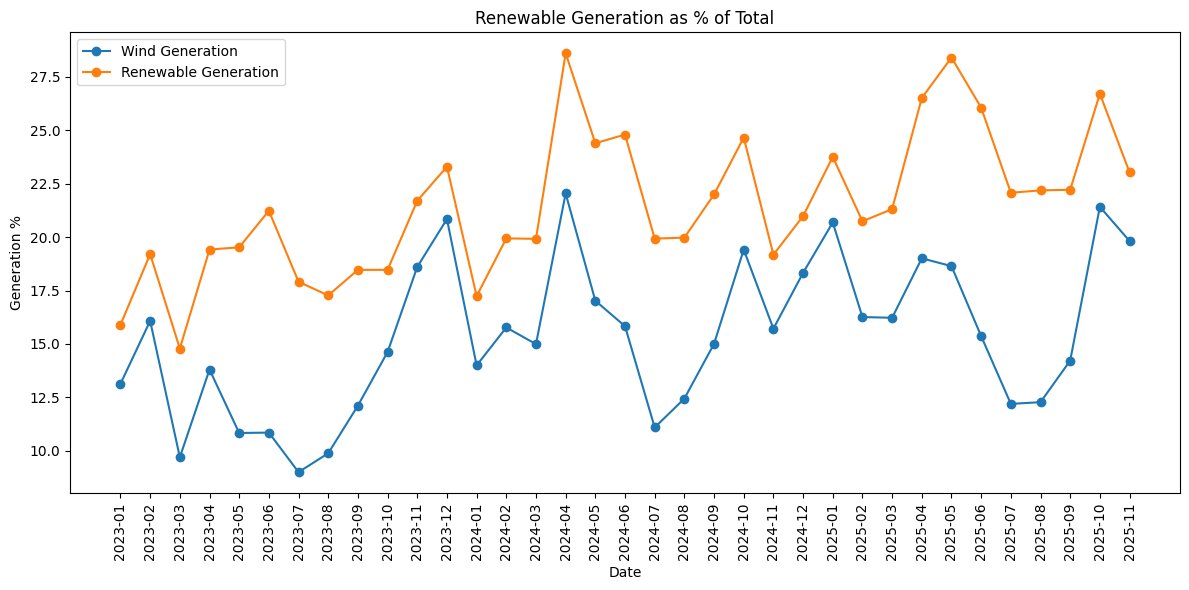

-0.6480870607956983


In [80]:
# Section 6: Relationship between price and renewable generation

pg = pd.read_csv('PowerGeneration2023-2025.csv')

# Calculate renewable generation %
wind_gen = (pg['Wind Turbine (MWh)']/pg['Total (MWh)'])*100
ren_gen = ((pg['Hydraulic Turbine (MWh)'] + pg['Wind Turbine (MWh)'] + pg['Solar (MWh)'] )/pg['Total (MWh)'])*100

# Plot renewable generation
fig, ax = plt.subplots(figsize=(12,6))
gen = pd.DataFrame({
    'Wind Generation' : wind_gen,
    'Renewable Generation' : ren_gen
})
gen.index = pg['Date']
gen.plot(ax=ax, kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Generation %')
plt.title('Renewable Generation as % of Total')
plt.xticks(range(len(gen)), gen.index, rotation=90)
plt.tight_layout()
plt.show()

# Correlation
df_sum = pd.concat([df,df1,df2])
monthy_avg_price = df_sum.groupby(df_sum['Date'].dt.to_period('M'))['Actual Posted Pool Price'].mean()
monthy_avg_price = monthy_avg_price.iloc[:-1]

# Create a dataframe to calculate correlation
corr_df = pd.DataFrame({
    'Actual Posted Pool Price' : monthy_avg_price.values,
    'Wind Generation %' : wind_gen.values,
})
correlation = corr_df['Actual Posted Pool Price'].corr(corr_df['Wind Generation %'])
print(correlation)

From this observation, the correlation between wind generation and pool price is -0.65 suggesting an inverse relationship between the two. Since wind generation has near zero marginal cost, it is the first to dispatch in the merit order when available displacing higher cost natural gas generators resulting in a lower pool price. This supports the earlier statement that higher demand does not always result in higher prices.